In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge,Lasso

In [9]:
data=pd.read_csv('D:\\CarPrice_Assignment.csv')

In [27]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
data.isnull().sum()

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Dealing with categorical variables

In [19]:
data_cat= data.select_dtypes(include='object')

In [20]:
data_cat

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [21]:
data_cat_dummy=pd.get_dummies(data_cat,drop_first=True)

In [22]:
data_cat_dummy

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
data_num=data.select_dtypes(exclude='object')

In [24]:
data_final= data_num.join(data_cat_dummy)
data_final

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [25]:
X= data_final.drop('price',axis=1)
y=data_final['price']

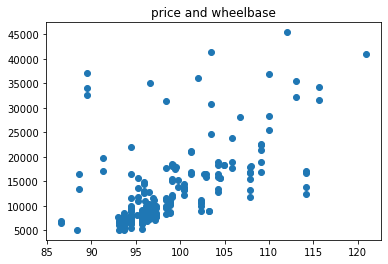

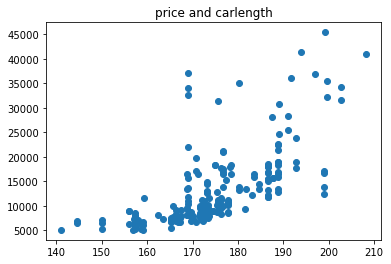

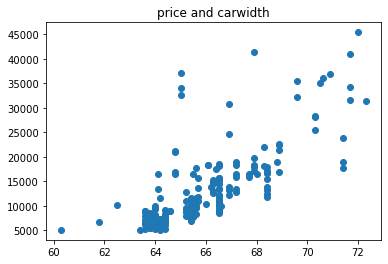

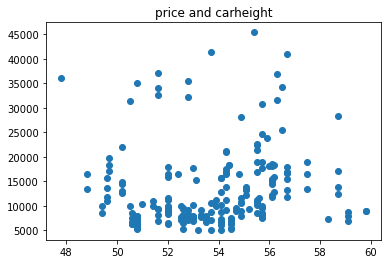

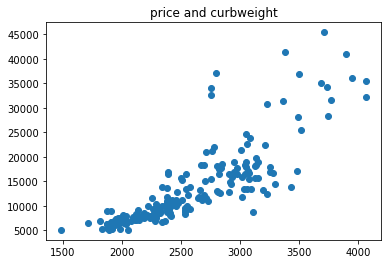

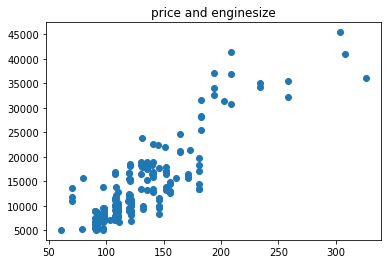

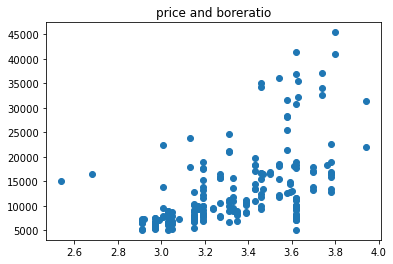

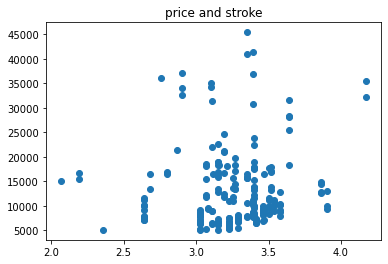

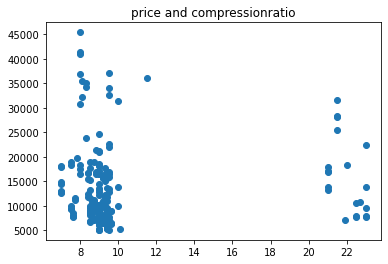

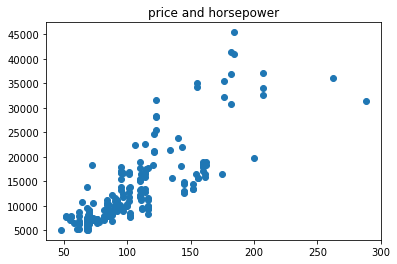

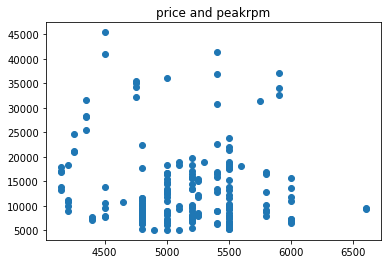

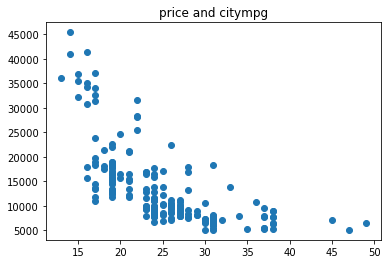

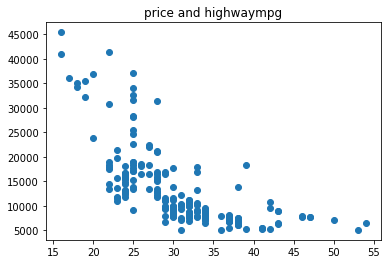

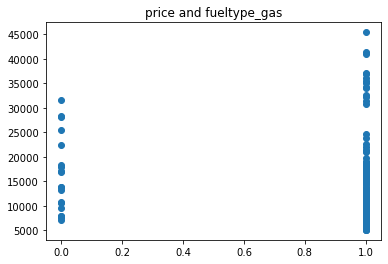

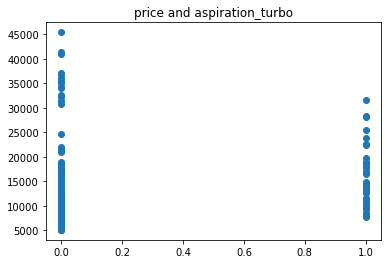

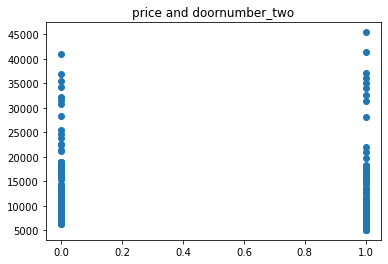

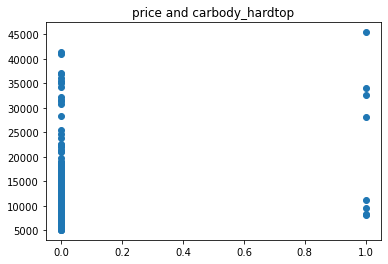

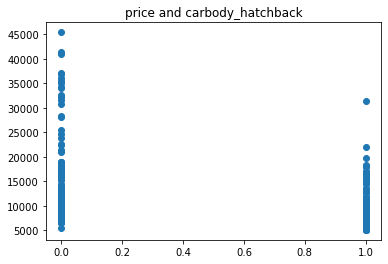

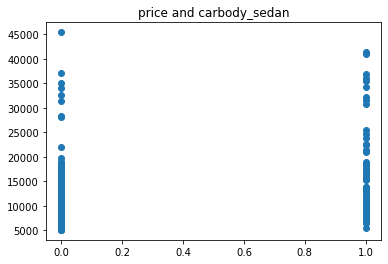

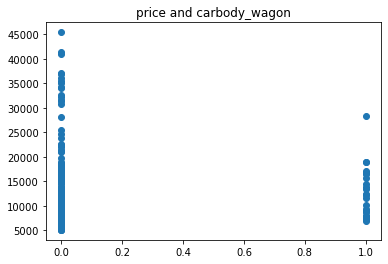

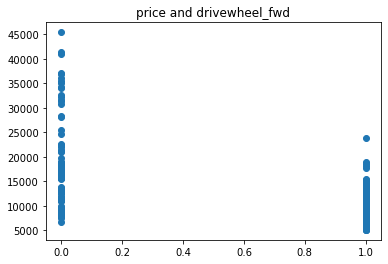

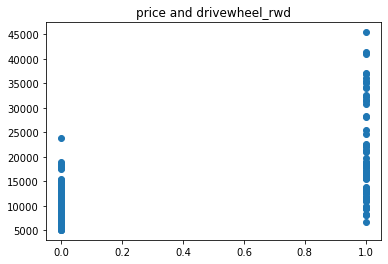

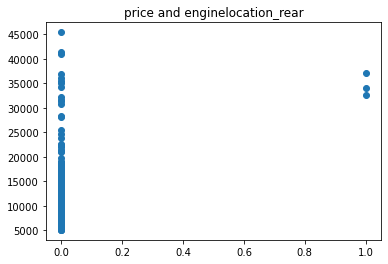

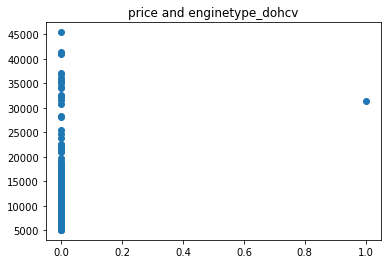

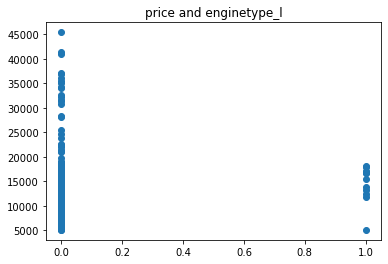

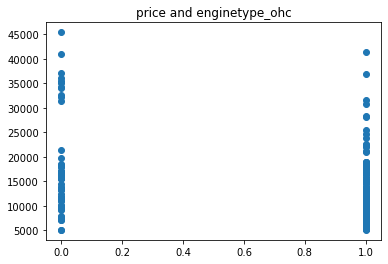

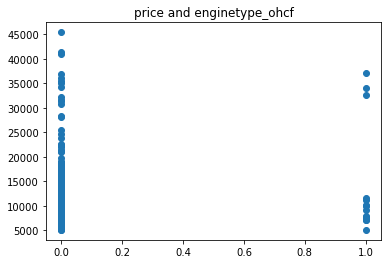

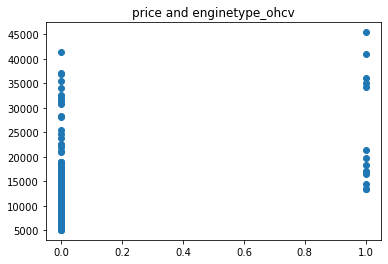

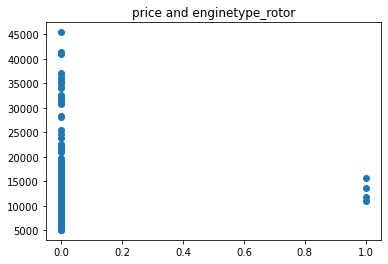

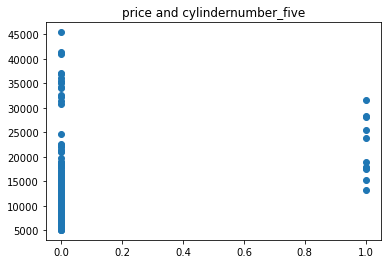

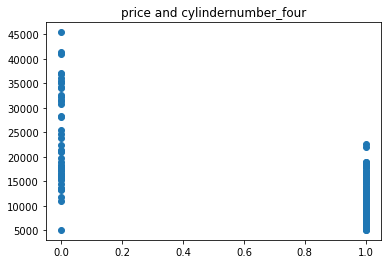

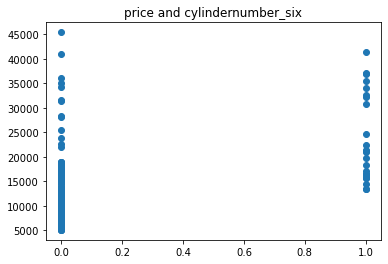

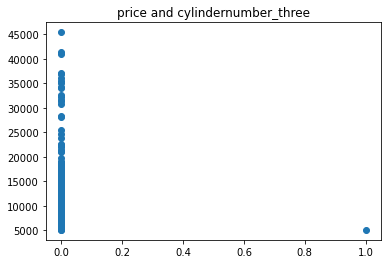

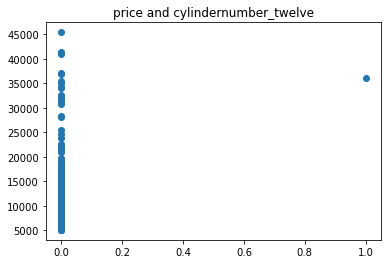

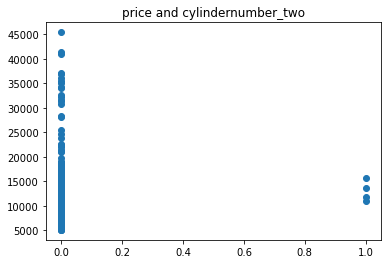

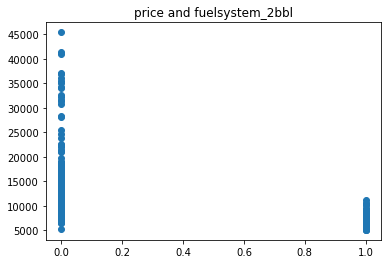

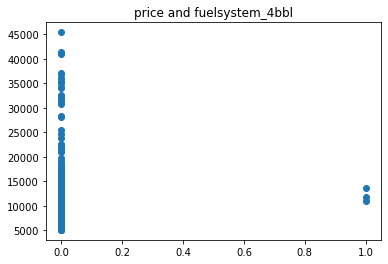

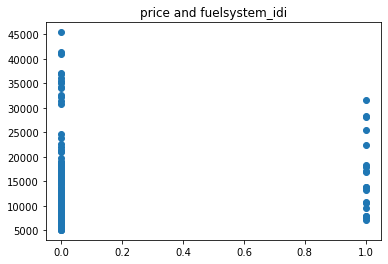

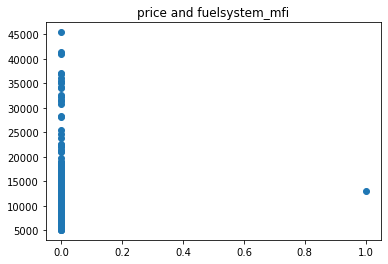

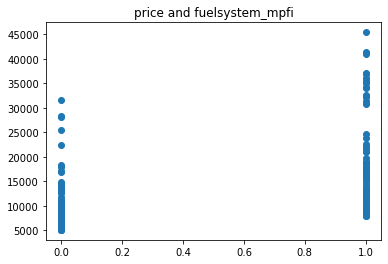

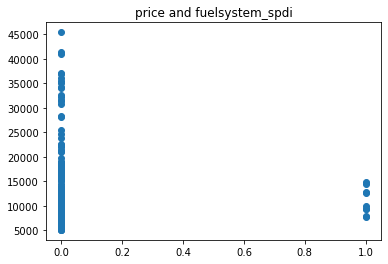

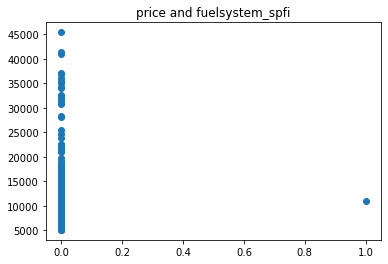

In [26]:
for i in X.columns:
    plt.scatter(X[i],y)
    plt.title("price and "+ i)
    plt.show()

#### Selecting relevant columns with feature selection

In [28]:
from sklearn.feature_selection import f_regression

In [29]:
summary = pd.DataFrame(data=X.columns,columns=['Features'])
summary['p_values']=f_regression(X,y)[1].round(3)

In [30]:
X=X.drop(summary[summary['p_values']>0.005]['Features'],axis=1)

In [31]:
data_final.corr()['price'][['enginesize','peakrpm','carbody_sedan','carbody_hatchback']]

enginesize           0.874145
peakrpm             -0.085267
carbody_sedan        0.125716
carbody_hatchback   -0.262039
Name: price, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [33]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.coef_

array([ 5.55233830e+01, -4.07241175e+01,  6.45647243e+02,  2.27767384e+00,
        9.24551852e+01, -2.47132204e+03,  3.13357905e+01,  7.47094136e+01,
       -4.56779788e+01, -2.20583117e+03, -1.74303791e+03, -9.70625282e+02,
        5.95709835e+02,  1.21874166e+04,  1.37395567e+03, -3.19078017e+03,
       -5.80024488e+03, -7.32482957e+03, -5.13849641e+03,  9.09494702e-13,
        2.85873382e+02,  6.02110105e+02])

In [34]:
regsummary=pd.DataFrame(data=X.columns,columns=['features'])

#### From the regression coefficient and plots

price increases with engine size

car(hatchback) causes the price to reduce

#### From feature selection and plots

car(sedan) has no effect on the price

peakrpm has no effect on the price

In [35]:
reg.score(x_test,y_test)

0.8526370449219256

##### Linear Model has an R squared value of 0.85


      


In [36]:
alpha=[10,1,0.1,0.0001,1e-8]
rid_score=[]
las_score=[]
for i in alpha:
    rid=Ridge(alpha=i)
    las=Lasso(alpha=i)
    rid.fit(x_train,y_train)
    las.fit(x_train,y_train)
    rid_score.append(rid.score(x_train,y_train))
    las_score.append(las.score(x_train,y_train))

In [37]:
rid_score,np.mean(rid_score)

([0.881791826362136,
  0.9010974397411561,
  0.9071923888251023,
  0.9074035587508728,
  0.9074035590091352],
 0.9009777545376805)

In [38]:
las_score,np.mean(las_score)

([0.9058859776239997,
  0.9073883827159883,
  0.9074034072449413,
  0.9074035590089834,
  0.9074035590091352],
 0.9070969771206097)

#### Ridge regression has a mean R squared of 0.

#### Lasso regression has a mean R squared of 0.907

